## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Nvidia\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

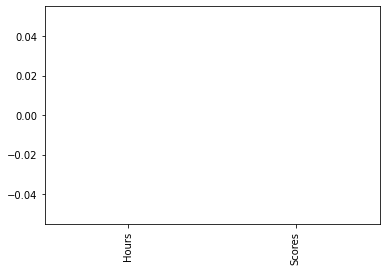

In [6]:
data.isnull().sum().plot(kind='bar')

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(25, 2)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

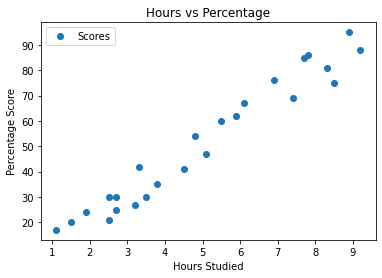

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<AxesSubplot:ylabel='Frequency'>

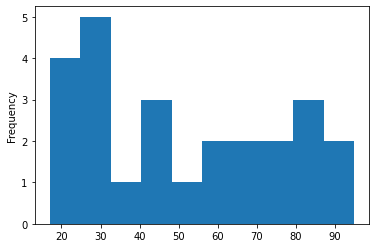

In [10]:
data['Scores'].plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x24127a6f4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x24127a6fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x24127a6f130>],
 'medians': [<matplotlib.lines.Line2D at 0x24127a792e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24127a79610>],
 'means': []}

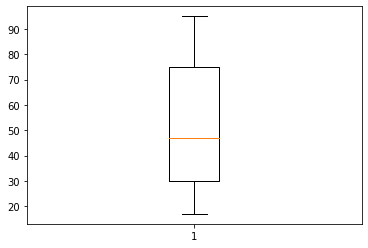

In [11]:
plt.boxplot(x=data['Scores'],data=data)

{'whiskers': [<matplotlib.lines.Line2D at 0x24127ad0f40>,
 'caps': [<matplotlib.lines.Line2D at 0x24127ae06a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24127ad0c70>],
 'medians': [<matplotlib.lines.Line2D at 0x24127ae0dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24127aeb190>],
 'means': []}

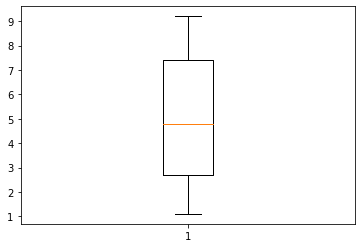

In [12]:
plt.boxplot(x=data['Hours'],data=data)

<AxesSubplot:>

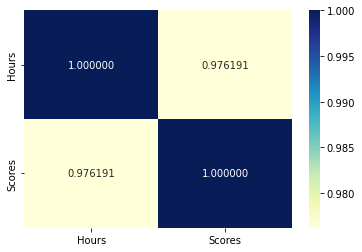

In [13]:
sns.heatmap(data.corr(),  annot=True, fmt="f" ,cmap="YlGnBu")

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [14]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [15]:
X.shape

(25, 1)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [16]:
y.shape

(25,)

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=41) 

In [18]:
X_train.shape,y_train.shape

((20, 1), (20,))

In [19]:
X_test.shape,y_test.shape

((5, 1), (5,))

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


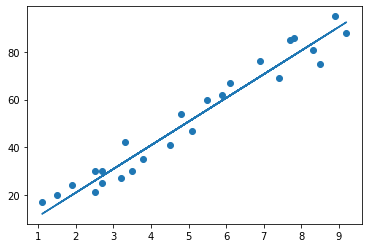

In [21]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [22]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [7.4]
 [1.1]
 [7.7]
 [5.5]]


In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,15.964757
1,69,74.613283
2,17,11.988585
3,85,77.595411
4,60,55.726469


In [24]:
# You can also test with your own data
hours =np.array(9.25).reshape(-1,1)

In [25]:
hours.shape

(1, 1)

In [26]:
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.00307453402289


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.267612082160115


In [28]:
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 29.199482214072795
